# Day 08. Exercise 03
# Overfitting

## 0. Imports

In [146]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import joblib

## 1. Preprocessing

1. Read the file `dayofweek.csv` to a dataframe.
2. Using `train_test_split` with parameters `test_size=0.2`, `random_state=21` get `X_train`, `y_train`, `X_test`, `y_test`.
3. Using, for example, `value_counts()` to check if the distribution of classes is similar in train and test.
4. Use the additional parameter `stratify=` and check the distribution again, now it should be more or less similar in both datasets.

## Читаем файл

In [147]:
df = pd.read_csv('../data/dayofweek.csv')

## Отделяем признаки и целевую переменную

In [148]:
X = df.drop(columns=['dayofweek'], axis=1)
y = df['dayofweek']

## Разбивка без стратификации

In [149]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=21)

## Проверяем распределение классов в y_train и y_test

In [150]:
print("Train set:")
print(y_train.value_counts(normalize=True))
print("\nTest set:")
print(y_test.value_counts(normalize=True))

Train set:
dayofweek
3    0.232196
6    0.212908
1    0.164688
5    0.160237
2    0.092730
0    0.077893
4    0.059347
Name: proportion, dtype: float64

Test set:
dayofweek
3    0.245562
6    0.204142
5    0.162722
1    0.153846
0    0.091716
4    0.071006
2    0.071006
Name: proportion, dtype: float64


## Разбивка с параметром stratify

In [151]:
X_train_strat, X_test_strat, y_train_strat, y_test_strat = train_test_split(
    X, y, test_size=0.2, random_state=21, stratify=y)
print("\nClass distribution with stratify:")
print("Train set:")
print(y_train_strat.value_counts())
print("\nTest set:")
print(y_test_strat.value_counts())


Class distribution with stratify:
Train set:
dayofweek
3    316
6    285
1    219
5    217
2    119
0    109
4     83
Name: count, dtype: int64

Test set:
dayofweek
3    80
6    71
1    55
5    54
2    30
0    27
4    21
Name: count, dtype: int64


## 2. Baseline models

1. Train exactly the same baseline models from the previous exercise and calculate the accuracies using the test dataset with stratification.
2. Did all the models show the similar values of the metric? Which one has the largest difference comparing the current exercise and the previous? Put the answer to the markdown cell in the end of the section.

### a. Logreg

In [152]:
logreg = LogisticRegression(random_state=21, fit_intercept=True, solver='lbfgs')
logreg.fit(X_train_strat, y_train_strat)
y_pred_logreg = logreg.predict(X_test_strat)

In [153]:
acc_logreg = accuracy_score(y_test_strat, y_pred_logreg)

### b. SVM

In [154]:
svc = OneVsRestClassifier(SVC(kernel='linear', probability=True, random_state=21))
svc.fit(X_train_strat, y_train_strat)
y_pred_svc = svc.predict(X_test_strat)
acc_svc = accuracy_score(y_test_strat, y_pred_svc)

### c. Decision tree

In [155]:
dt = DecisionTreeClassifier(max_depth=4, random_state=21)
dt.fit(X_train_strat, y_train_strat)
y_pred_dt = dt.predict(X_test_strat)
acc_dt = accuracy_score(y_test_strat, y_pred_dt)

### d. Random forest

In [156]:
rf = RandomForestClassifier(n_estimators=100, max_depth=25, random_state=21)
rf.fit(X_train_strat, y_train_strat)
y_pred_rf = rf.predict(X_test_strat)
acc_rf = accuracy_score(y_test_strat, y_pred_rf)

## Вывод результатов

In [157]:
print("Accuracy on test set with stratified split:")
print(f"Logistic Regression: {acc_logreg}")
print(f"SVC (linear kernel): {acc_svc}")
print(f"Decision Tree (max_depth=4): {acc_dt}")
print(f"Random Forest (n_estimators=100, max_depth=25): {acc_rf}")

Accuracy on test set with stratified split:
Logistic Regression: 0.6331360946745562
SVC (linear kernel): 0.6183431952662722
Decision Tree (max_depth=4): 0.5295857988165681
Random Forest (n_estimators=100, max_depth=25): 0.9289940828402367


## Did all the models show the similar values of the metric?
Answer: Random Forest
## Which one has the largest difference comparing the current exercise and the previous?
Answer: c

## 3. Crossvalidation

We could play with parameters of the model trying to achive a better accuracy on the test dataset, but it is a bad practice. It leads us again to overfitting. Test dataset is only for checking quality of a final model.

But there is another way of solving the problem – crossvalidation. It does not use test dataset, but creates one more split of train dataset. Again, there are different ways of doing it, but the common thing is that there is a validation dataset that is used for hyperparameters optimization.

1. Using `cross_val_score` with `cv=10` calculate the mean accuracy and standard deviation for every model that you used before (logreg with `solver='liblinear'`, SVC, decision tree, random forest).

### a. Logreg

In [158]:
logreg = OneVsRestClassifier(LogisticRegression(solver='liblinear', fit_intercept=False, random_state=21))
scores_logreg = cross_val_score(logreg, X_train_strat, y_train_strat, cv=10)

### b. SVM

In [159]:
svc = SVC(kernel='linear', random_state=21)
scores_svc = cross_val_score(svc, X_train_strat, y_train_strat, cv=10)

### c. Decision tree

In [160]:
dt = DecisionTreeClassifier(max_depth=4, random_state=21)
scores_dt = cross_val_score(dt, X_train_strat, y_train_strat, cv=10)

### d. Random forest

In [161]:
rf = RandomForestClassifier(n_estimators=100, max_depth=25, random_state=21)
scores_rf = cross_val_score(rf, X_train_strat, y_train_strat, cv=10)

## Вывод результатов

In [162]:
print("Cross-Validation Accuracy Scores (mean ± std):")
print(f"Logistic Regression: {scores_logreg.mean()} ± {scores_logreg.std()}")
print(f"SVC (linear kernel): {scores_svc.mean()} ± {scores_svc.std()}")
print(f"Decision Tree (max_depth=4): {scores_dt.mean()} ± {scores_dt.std()}")
print(f"Random Forest (n_estimators=100, max_depth=25): {scores_rf.mean()} ± {scores_rf.std()}")

Cross-Validation Accuracy Scores (mean ± std):
Logistic Regression: 0.5815975677169707 ± 0.025322132907253592
SVC (linear kernel): 0.6587064676616916 ± 0.043585708770590564
Decision Tree (max_depth=4): 0.5088944168048645 ± 0.031903139495514356
Random Forest (n_estimators=100, max_depth=25): 0.9176561636263129 ± 0.02159583796321821


## 4. Optimization

1. Choose the best model and play a little bit with the parameters on cross-validation, find a good enough parameter or a combination of the parameters.
2. Calculate the accuracy for the final model on the test dataset.
3. Draw a plot that displays the top-10 most  important features for that model.
4. Save the model using `joblib`.
5. Load the model, make predictions for the test dataset and calculate the accuracy.

In [163]:
# 1. Подбор параметров (пример для RandomForest)
# Можно поэкспериментировать, например, с max_depth и n_estimators
# Для примера возьмём параметры, которые показались хорошими
best_params = {'n_estimators': 100, 'max_depth': 25, 'random_state': 21}
final_model = RandomForestClassifier(**best_params)
final_model.fit(X_train_strat, y_train_strat)

,n_estimators,100
,criterion,'gini'
,max_depth,25
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [164]:
# 2. Accuracy на тесте
y_pred = final_model.predict(X_test_strat)
acc = accuracy_score(y_test_strat, y_pred)
print(f"Test accuracy: {acc}")

Test accuracy: 0.9289940828402367


In [165]:
# 3. Функция для отрисовки топ-10 признаков
def plot_top_features(model, feature_names, top_n=10):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1][:top_n]
    plt.figure(figsize=(8,6))
    plt.barh(range(top_n), importances[indices][::-1], color='skyblue')
    plt.yticks(range(top_n), np.array(feature_names)[indices][::-1])
    plt.xlabel("Feature Importance")
    plt.title("Top 10 Important Features")
    plt.show()

In [166]:
# Список имен признаков (предполагается, что у тебя есть)
feature_names = X_train_strat.columns

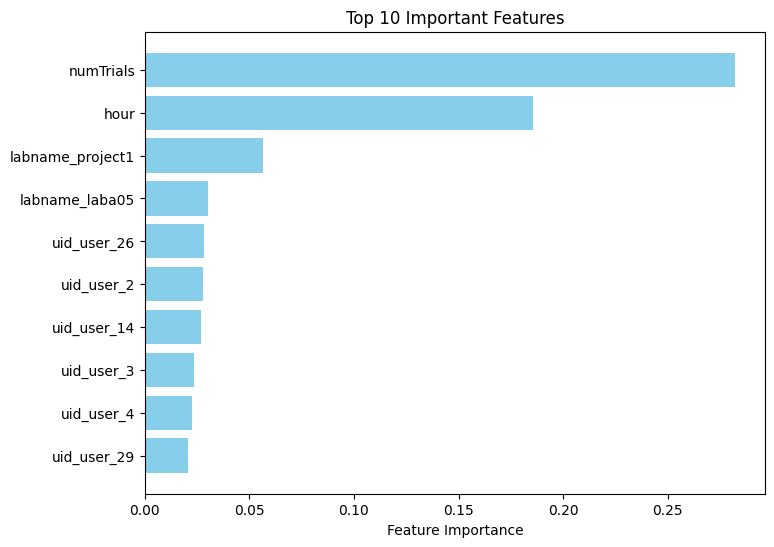

In [167]:
plot_top_features(final_model, feature_names, top_n=10)

In [168]:
# 4. Сохраняем модель
joblib.dump(final_model, 'best_model.joblib')

['best_model.joblib']

In [169]:
# 5. Загружаем модель, делаем предсказания и считаем accuracy
loaded_model = joblib.load('best_model.joblib')
y_pred_loaded = loaded_model.predict(X_test_strat)
acc_loaded = accuracy_score(y_test_strat, y_pred_loaded)
print(f"Accuracy with loaded model: {acc_loaded}")

Accuracy with loaded model: 0.9289940828402367
